In [1]:
# testing autoregressive model fit to validate data cleaning success

In [136]:
# loading data
import urllib.request

# data manipulation
import pandas as pd
from pandas import datetools
import numpy as np
from pandas.tools.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf

# plotting
import matplotlib.pyplot as plt
# enable interactive plot in the notebook
%matplotlib notebook

In [137]:
def LoadData(id):
    # API URL to underground water levels in Ljubljana aquifer
    # station with id 85076 is 1279238400Lj - RTV (0261) Ljubljansko polje
    url = "http://atena.ijs.si:8080/CollectorAPIServer/undergroundWater?station_id=" + str(id);
    jsonStr = urllib.request.urlopen(url).read().decode('utf-8');
    df = pd.read_json(jsonStr);

    # converting unix timestamp to date-time object
    df.insert(loc = 0, column = 'Date', value=df['LastUpdatedEpoch']);
    df['Date'] = pd.to_datetime(df['Date'], unit='ms');
    df.index = pd.Index(df['Date'])
    del df['Date']

    # remove unneccessary fields
    df.drop('LastUpdated', 1, inplace=True);
    df.drop('LastUpdatedEpoch', 1, inplace=True);
    df.drop('Region_id', 1, inplace=True);
    df.drop('Region_name', 1, inplace=True);
    df.drop('Station_id', 1, inplace=True);
    df.drop('Station_name', 1, inplace=True);
    df.drop('SystemCodeNumber', 1, inplace=True);
    
    return df

In [138]:
df = LoadData(65104)

In [139]:
df.set_value("1984-06-10", "Value", 0);

<IPython.core.display.Javascript object>


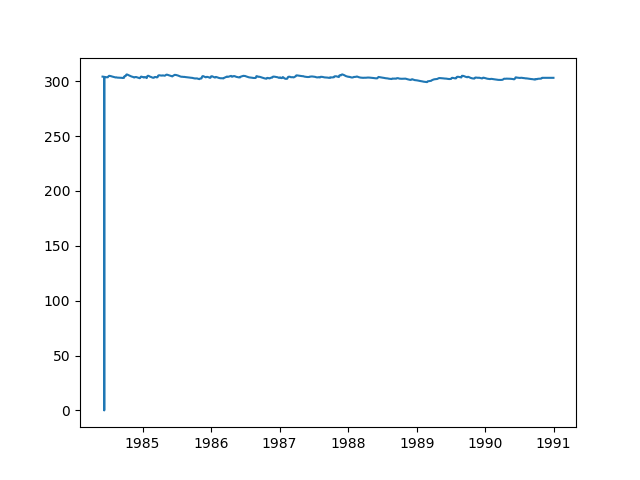

In [140]:
plt.plot(df["Value"])

<IPython.core.display.Javascript object>


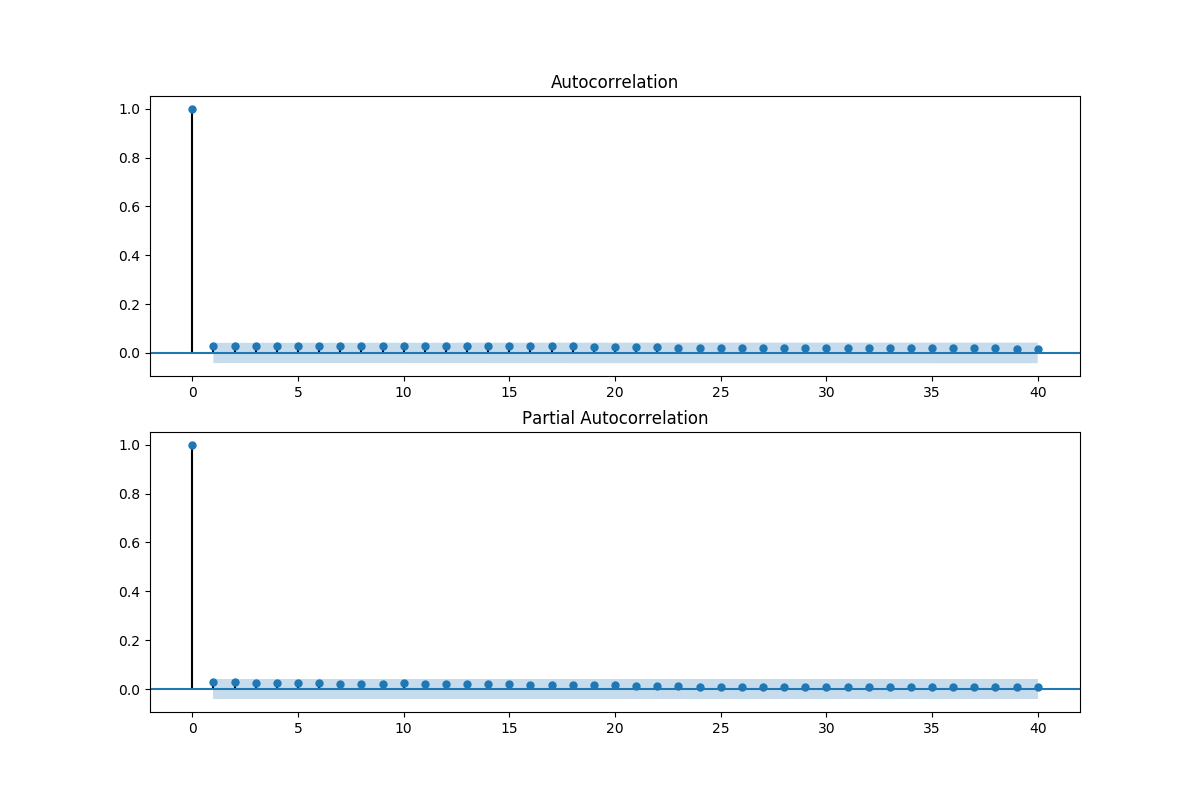

In [141]:
from statsmodels.graphics.api import qqplot
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df, lags=40, ax=ax2)

In [142]:
arma_mod30 = sm.tsa.ARMA(df, (1,0)).fit(disp=True)

<IPython.core.display.Javascript object>


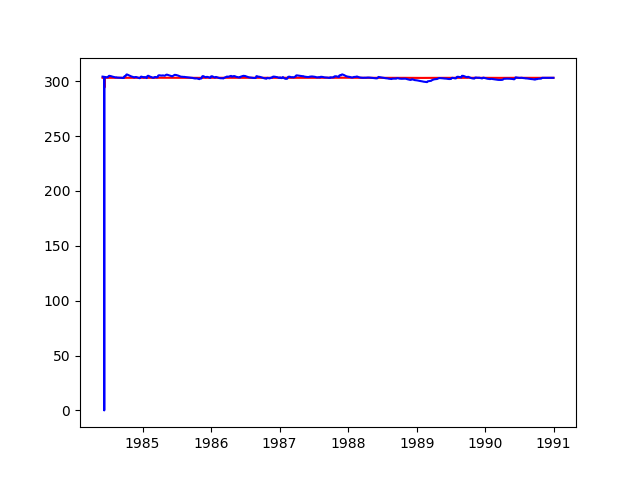

In [143]:
# plot modeling results
fig, ax = plt.subplots();
ax.plot(arma_mod30.fittedvalues, 'r');
ax.plot(df, 'b');
plt.show();

In [144]:
resids = arma_mod30.fittedvalues - df["Value"]
np.sqrt((resids ** 2).mean())

6.514731913540281

In [145]:
resids.mean()

1.2451463703756878e-05